# imports

In [120]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import datetime

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
sns.set(style="darkgrid")



from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ParameterGrid

In [33]:
global_temp_df = pd.read_csv('data/global_temp_df.csv')

In [34]:
global_temp_df['dt'] = global_temp_df['dt'].apply(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d'))
global_temp_df.set_index('dt', inplace=True)

## treating data

In [35]:
global_temp_diff = pd.DataFrame(global_temp_df['LandAndOceanAverageTemperature'].diff(1))

In [36]:
global_temp_diff.describe()

,LandAndOceanAverageTemperature
count,1991.000000
mean,0.000975
std,0.653832
min,-1.394000
25%,-0.617000
50%,0.074000
75%,0.607000
max,1.194000


In [37]:
global_temp_diff.dropna(inplace=True)

In [38]:
global_temp_diff

,LandAndOceanAverageTemperature
dt,
1850-02-01,0.755
1850-03-01,0.455
1850-04-01,0.624
1850-05-01,0.840
1850-06-01,0.846
...,...
2015-08-01,-0.022
2015-09-01,-0.540
2015-10-01,-0.759


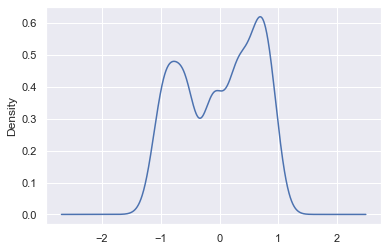

In [39]:
global_temp_diff['LandAndOceanAverageTemperature'].plot(kind='kde')

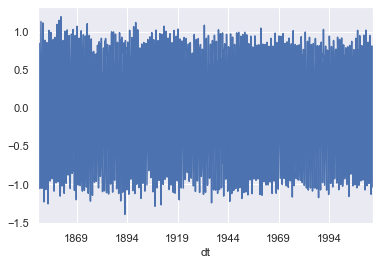

In [40]:
global_temp_diff['LandAndOceanAverageTemperature'].plot()

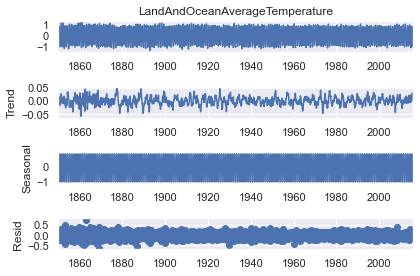

In [41]:
s_decomp = seasonal_decompose(global_temp_diff['LandAndOceanAverageTemperature'], model='additive', period=12)
s_decomp.plot()
plt.show()

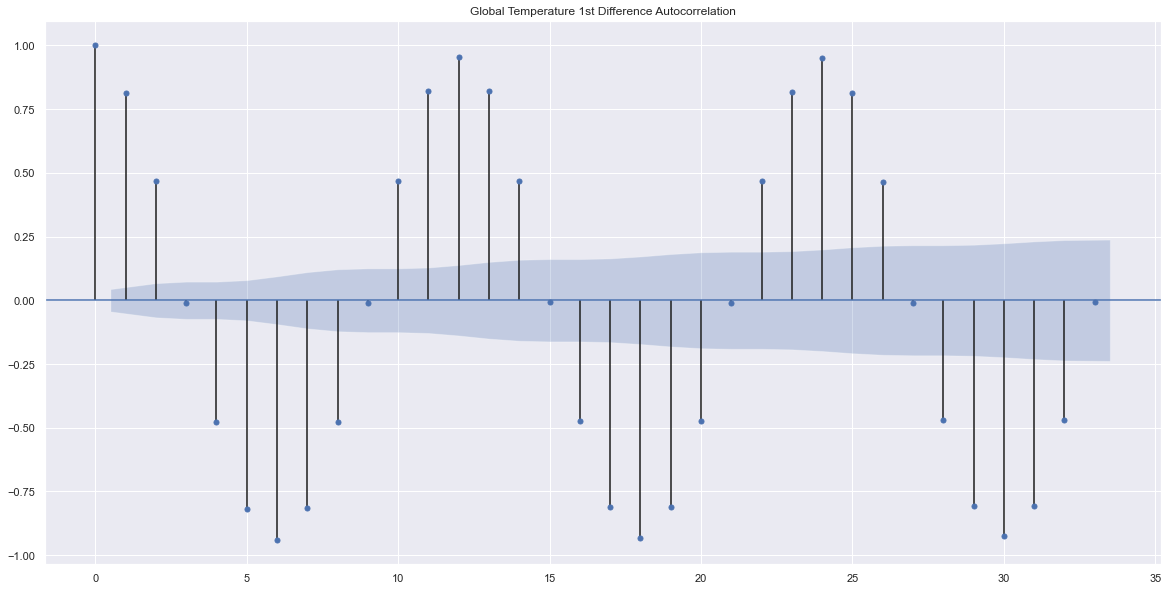

In [46]:
fig, ax = plt.subplots(figsize=(20,10))

ax = plot_acf(global_temp_diff['LandAndOceanAverageTemperature'], ax, title='Global Temperature 1st Difference Autocorrelation')

plt.show()

## creating lagged DF

In [55]:
lagged_df = pd.DataFrame()

In [56]:
for i in range(12, 0, -1):
    lagged_df[['t-' + str(i)]] = global_temp_diff.shift(i)


In [57]:
lagged_df['t'] = global_temp_diff['LandAndOceanAverageTemperature']

In [59]:
lagged_df

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
dt,,,,,,,,,,,,,
1851-02-01,0.755,0.455,0.624,0.840,0.846,0.430,-0.065,-0.832,-1.055,-0.934,-0.597,-0.055,0.086
1851-03-01,0.455,0.624,0.840,0.846,0.430,-0.065,-0.832,-1.055,-0.934,-0.597,-0.055,0.086,0.566
1851-04-01,0.624,0.840,0.846,0.430,-0.065,-0.832,-1.055,-0.934,-0.597,-0.055,0.086,0.566,0.743
1851-05-01,0.840,0.846,0.430,-0.065,-0.832,-1.055,-0.934,-0.597,-0.055,0.086,0.566,0.743,1.131
1851-06-01,0.846,0.430,-0.065,-0.832,-1.055,-0.934,-0.597,-0.055,0.086,0.566,0.743,1.131,0.725
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-01,0.099,-0.632,-0.946,-1.130,-0.489,-0.155,0.309,0.629,0.769,0.812,0.616,0.221,-0.022
2015-09-01,-0.632,-0.946,-1.130,-0.489,-0.155,0.309,0.629,0.769,0.812,0.616,0.221,-0.022,-0.540
2015-10-01,-0.946,-1.130,-0.489,-0.155,0.309,0.629,0.769,0.812,0.616,0.221,-0.022,-0.540,-0.759


In [60]:
lagged_df.dropna(axis=0, inplace=True)

### features and target

In [67]:
lagged_df.iloc[:, :-1]

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
dt,,,,,,,,,,,,
1851-02-01,0.755,0.455,0.624,0.840,0.846,0.430,-0.065,-0.832,-1.055,-0.934,-0.597,-0.055
1851-03-01,0.455,0.624,0.840,0.846,0.430,-0.065,-0.832,-1.055,-0.934,-0.597,-0.055,0.086
1851-04-01,0.624,0.840,0.846,0.430,-0.065,-0.832,-1.055,-0.934,-0.597,-0.055,0.086,0.566
1851-05-01,0.840,0.846,0.430,-0.065,-0.832,-1.055,-0.934,-0.597,-0.055,0.086,0.566,0.743
1851-06-01,0.846,0.430,-0.065,-0.832,-1.055,-0.934,-0.597,-0.055,0.086,0.566,0.743,1.131
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-01,0.099,-0.632,-0.946,-1.130,-0.489,-0.155,0.309,0.629,0.769,0.812,0.616,0.221
2015-09-01,-0.632,-0.946,-1.130,-0.489,-0.155,0.309,0.629,0.769,0.812,0.616,0.221,-0.022
2015-10-01,-0.946,-1.130,-0.489,-0.155,0.309,0.629,0.769,0.812,0.616,0.221,-0.022,-0.540


In [68]:
lagged_df.iloc[:, -1:]

,t
dt,
1851-02-01,0.086
1851-03-01,0.566
1851-04-01,0.743
1851-05-01,1.131
1851-06-01,0.725
...,...
2015-08-01,-0.022
2015-09-01,-0.540
2015-10-01,-0.759


In [160]:
X = lagged_df.iloc[:, :-1].values
y = lagged_df.iloc[:, -1:].values

In [161]:
train_size = int(len(X) * 0.8)

In [162]:
X_train, X_test, y_train, y_test = X[0:train_size], X[train_size:len(X)], y[0:train_size], y[train_size:len(X)]

In [163]:
print('train size ' +str(len(X_train) ))

print('test size ' +str(len(X_test) ))

train size 1583
test size 396


## Decicion Tree

does not work well with data w trend

In [164]:
global_temp_tree = DecisionTreeRegressor(max_depth= 5)
global_temp_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [165]:
global_temp_tree.score(X_train, y_train)

0.9597479378702457

In [166]:
global_temp_tree.score(X_test, y_test)

0.9551081283788231

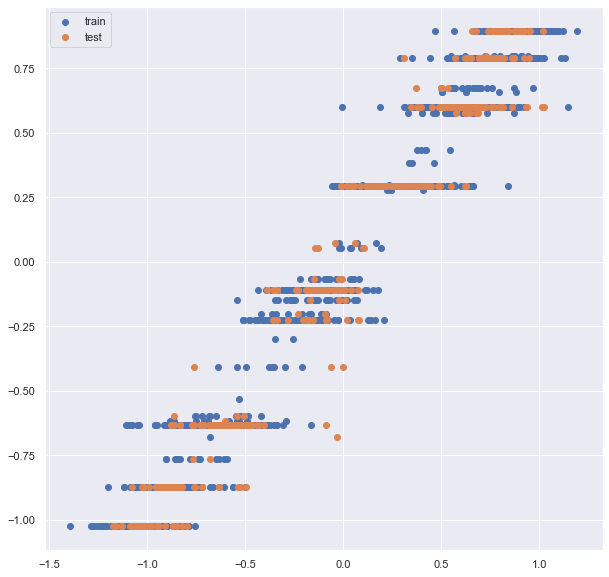

In [171]:
plt.subplots(figsize=(10,10))
train_prediction = global_temp_tree.predict(X_train)
test_prediction = global_temp_tree.predict(X_test)
plt.scatter(y_train, train_prediction, label='train')
plt.scatter(y_test, test_prediction, label='test')
plt.legend()
plt.show()

## Random Forest

In [130]:
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(X_train, y_train.ravel())

RandomForestRegressor(n_estimators=200)

In [131]:
rfr.score(X_train, y_train)

0.9937380315391892

In [132]:
rfr.score(X_test, y_test)

0.9694466144596203

### grid search

In [133]:
grid = {'n_estimators': [50, 100, 200], 'max_depth': {3, 5, 7}, 'max_features': [2,3,4,5,6,7,8,9,10,11,12], 'random_state': [42]}
test_scores = []

In [134]:
for g in ParameterGrid(grid):
    rfr.set_params(**g)
    rfr.fit(X_train, y_train.ravel())
    test_scores.append(rfr.score(X_test, y_test))

In [149]:
best_score_index = np.argmax(test_scores)
best_score_index

69

In [140]:
test_scores[best_score_index]

0.9706200879463951

In [146]:
ParameterGrid(grid)

In [153]:
index = 0
best_grid = dict()
for g in ParameterGrid(grid):
    if(best_score_index == index):
        print(g)
        best_grid = g
    index = index + 1


{'max_depth': 7, 'max_features': 3, 'n_estimators': 50, 'random_state': 42}


In [154]:
print(test_scores[best_score_index], best_grid)

0.9706200879463951 {'max_depth': 7, 'max_features': 3, 'n_estimators': 50, 'random_state': 42}


In [155]:
rfr = RandomForestRegressor(max_depth=7, max_features=3, n_estimators=50, random_state=42)
rfr.fit(X_train, y_train.ravel())

RandomForestRegressor(max_depth=7, max_features=3, n_estimators=50,
                      random_state=42)

In [156]:
rfr.score(X_train, y_train)

0.9749522051898355

In [157]:
rfr.score(X_test, y_test)

0.9706200879463951

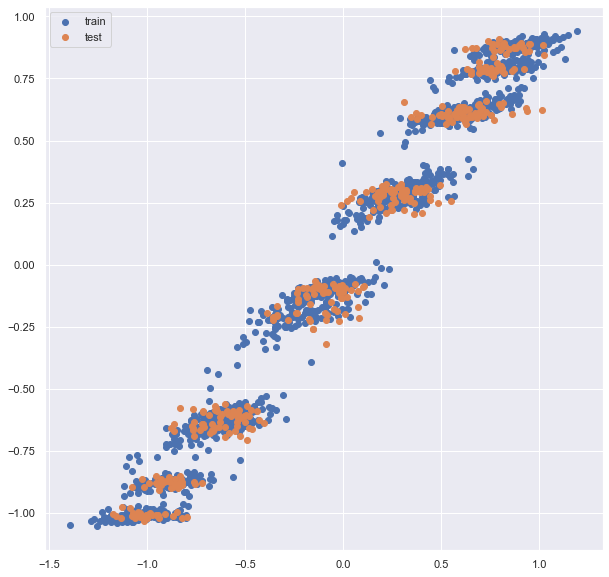

In [170]:
plt.subplots(figsize=(10,10))

train_prediction = rfr.predict(X_train)
test_prediction = rfr.predict(X_test)
plt.scatter(y_train, train_prediction, label='train')
plt.scatter(y_test, test_prediction, label='test')
plt.legend()
plt.show()

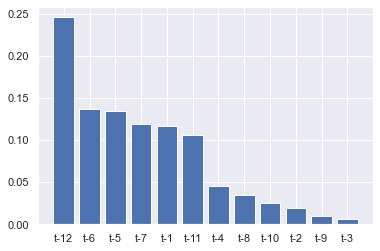

In [174]:
importances = rfr.feature_importances_
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))

names = ['t-12','t-11','t-10','t-9','t-8','t-7','t-6','t-5','t-4','t-3','t-2','t-1']
labels = np.array(names)[sorted_index]

plt.bar(x, importances[sorted_index], tick_label=labels)

plt.show()